In [228]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Подключение к базе данных

In [229]:
df = pd.read_csv('../data/ab-test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uid     44 non-null     object 
 1   diff    44 non-null     float64
 2   time    44 non-null     object 
 3   group   44 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [230]:
df_before = df[df['time'] == 'before']
df_after = df[df['time'] == 'after']
df_before = [df_before[df_before['group'] == 'control']['diff'], df_before[df_before['group'] == 'test']['diff']]
df_after = [df_after[df_after['group'] == 'control']['diff'], df_after[df_after['group'] == 'test']['diff']]

In [231]:
len(df[df['time'] == 'before'])

22

In [232]:
len(df[df['time'] == 'after'])

22

## Функция для построения боксплотов

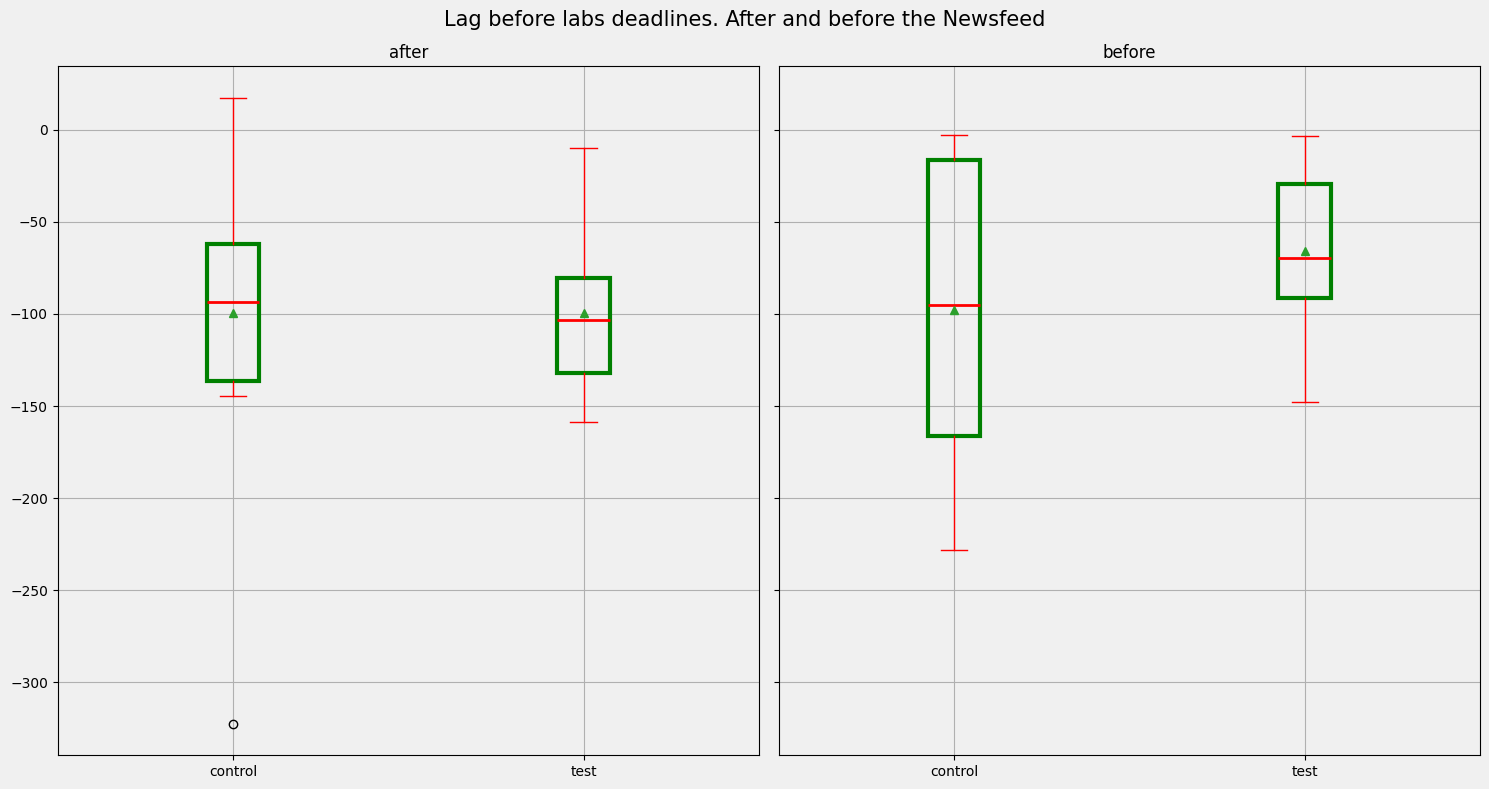

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

# Свойства отрисовки
boxprops = dict(color='green', linewidth=3, facecolor='none')
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='red', linewidth=1)
capprops = dict(color='red', linewidth=1)
flierprops = dict(marker='o', color='black')

# --- AFTER ---
bp_after = axes[0].boxplot(df_after,
                           showmeans=True,
                           patch_artist=True,
                           boxprops=boxprops,
                           medianprops=medianprops,
                           whiskerprops=whiskerprops,
                           capprops=capprops,
                           flierprops=flierprops)

axes[0].set_title('after')
axes[0].set_xticklabels(['control', 'test'])
axes[0].grid(True)

# Зелёные треугольники на медианах AFTER


# --- BEFORE ---
bp_before = axes[1].boxplot(df_before,
                            showmeans=True,
                            patch_artist=True,
                            boxprops=boxprops,
                            medianprops=medianprops,
                            whiskerprops=whiskerprops,
                            capprops=capprops,
                            flierprops=flierprops)

axes[1].set_title('before')
axes[1].set_xticklabels(['control', 'test'])
axes[1].grid(True)



# Цвет фона
for ax in axes:
    ax.set_facecolor('#f0f0f0')
fig.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()

## «Каково было межквартильное расстояние (IQR) контрольной группы до показа новостей?»

### IQR (Interquartile Range) - это межквартильный размах, который представляет собой разницу между третьим и первым квартилями.
Ответ: Около 150.

In [234]:
q1 = df_before[0].quantile(0.25)
q3 = df_before[0].quantile(0.75)
iqr = q3 - q1
print(iqr)

150.0


## Закрытие соедения с базой не требуется, так как подключение не производилось